In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
#sys.path.insert(0,"../")

import matplotsoccer as mps
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Load in actions from season 2015/16 of the Premier League

data = "../data/spadl-opta.h5"
games = pd.read_hdf(data,key="games")
epl16 = games[(games.competition_id == 8) & (games.season_id == 2016)]
epl16[:5]

def get_actions(games, hdf_url):
    actions = []
    for game in tqdm(list(games.itertuples())):
        a = pd.read_hdf(hdf_url, key="actions/game_" + str(game.game_id))
        a["left_to_right"] = a["team_id"] == game.home_team_id
        actions.append(a)
    actions = pd.concat(actions)

    #actions = always_ltr(actions)
    return actions


def always_ltr(actions):
    away_idx = ~actions.left_to_right
    actions.loc[away_idx, "start_x"] = 105 - actions[away_idx].start_x.values
    actions.loc[away_idx, "start_y"] = 68 - actions[away_idx].start_y.values
    actions.loc[away_idx, "end_x"] = 105 - actions[away_idx].end_x.values
    actions.loc[away_idx, "end_y"] = 68 - actions[away_idx].end_y.values
    return actions

actions = get_actions(epl16,data)

actiontypes = pd.read_hdf(data, key="actiontypes")
actiontypes.columns = ["type_id","type_name"]
actions = actions.merge(actiontypes, on="type_id")

players = pd.read_hdf(data,key="players")
actions = actions.merge(players)

teams = pd.read_hdf(data,key="teams")
actions = actions.merge(teams)

actions = actions.sort_values(["game_id","period_id","time_seconds","timestamp"])

actions.columns

100%|██████████| 380/380 [00:04<00:00, 77.60it/s]


Index(['game_id', 'period_id', 'time_seconds', 'timestamp', 'team_id',
       'player_id', 'start_x', 'start_y', 'end_x', 'end_y', 'result_id',
       'bodypart_id', 'type_id', 'left_to_right', 'type_name', 'first_name',
       'last_name', 'fullname', 'soccer_name', 'team_name', 'team_short',
       'team_abbr'],
      dtype='object')

# Actions

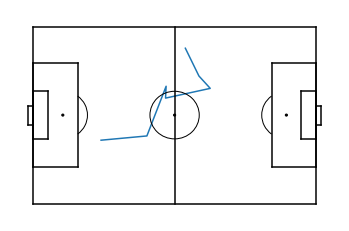

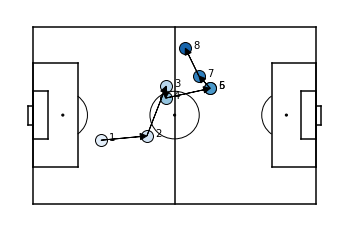

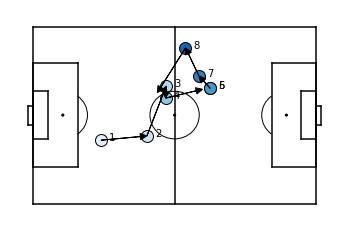

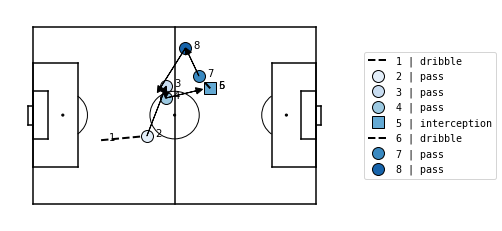

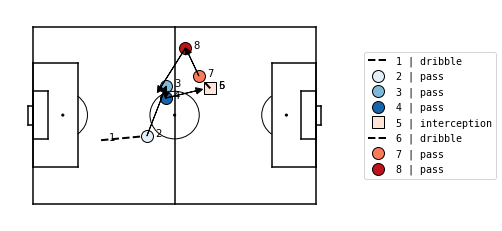

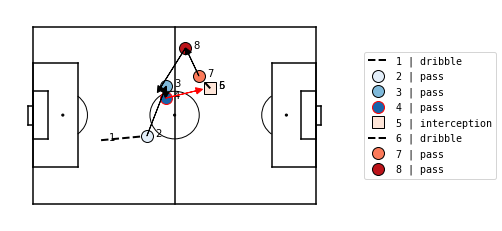

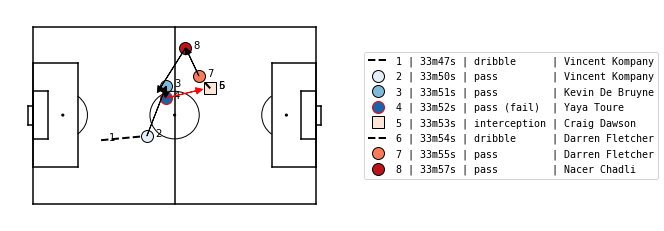

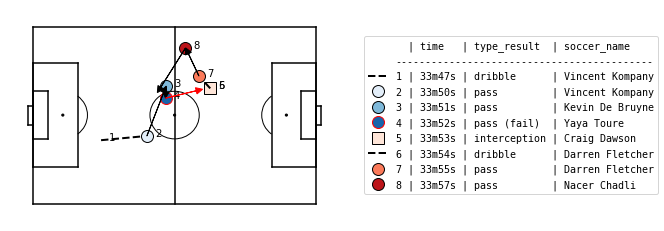

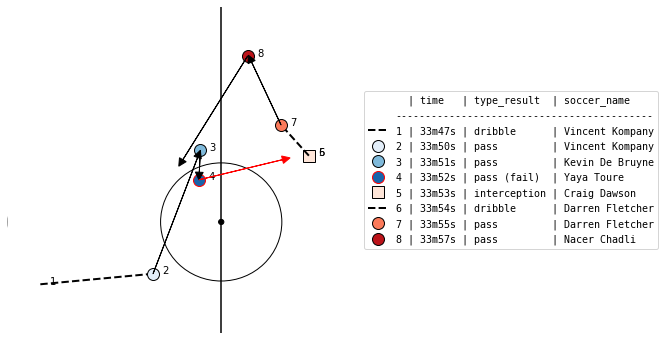

In [5]:
start = 471608
delta = 8
a = actions[start:start+delta].copy()

def time(action):
    return "%sm%ss" % (int(action.time_seconds) // 60, int(action.time_seconds) % 60)

def action_type(action):
    return action.type_name if action.result_id == 1 else action.type_name + " (fail)"

a["time"] = a.apply(time,axis=1)
a["type_result"] = a.apply(action_type,axis=1)
labels = a[["time","type_result","soccer_name"]]


mps.field(show=False)
plt.plot(a.start_x,a.start_y)
plt.show()

mps.actions(a[["start_x","start_y"]])
mps.actions(a[["start_x","start_y","end_x","end_y"]])
mps.actions(a[["start_x","start_y","end_x","end_y"]],a.type_name)
mps.actions(a[["start_x","start_y","end_x","end_y"]],a.type_name, team=a.team_id)
mps.actions(a[["start_x","start_y","end_x","end_y"]],a.type_name, team=a.team_id,result=a.result_id)
mps.actions(a[["start_x","start_y","end_x","end_y"]],a.type_name, team=a.team_id,result=a.result_id,label=labels)
mps.actions(a[["start_x","start_y","end_x","end_y"]],a.type_name,
            team=a.team_id,result=a.result_id,label=labels,labeltitle = labels.columns)
mps.actions(a[["start_x","start_y","end_x","end_y"]],a.type_name,
            team=a.team_id,result=a.result_id,label=labels,labeltitle = labels.columns,zoom=True)